# **Importando bibliotecas**

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import string
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
from util.construction import *
from util.analysis import *
from util.graphics import *

In [2]:
df = pd.read_csv('data/spotify_artists/spotify_artists.csv')
df

,external_urls,followers,genres,id,name,popularity,uri
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH
...,...,...,...,...,...,...,...
20486,https://open.spotify.com/artist/3xx17YXYvPl9PB...,56415,"contemporary vocal jazz, ectofolk, folk, lilith",3xx17YXYvPl9PBx6Jzalk4,Shelby Lynne,48,spotify:artist:3xx17YXYvPl9PBx6Jzalk4
20487,https://open.spotify.com/artist/3jvWpZJpokYCoT...,35290,"alternative emo, emo, midwest emo",3jvWpZJpokYCoT0QV4OJg0,You Blew It!,33,spotify:artist:3jvWpZJpokYCoT0QV4OJg0
20488,https://open.spotify.com/artist/53HxKgLPRmkmUq...,72,NaN,53HxKgLPRmkmUqzOv7qVL3,Z,0,spotify:artist:53HxKgLPRmkmUqzOv7qVL3
20489,https://open.spotify.com/artist/0SYlWdOsemdRbG...,0,NaN,0SYlWdOsemdRbGNNU6FF3h,Z,0,spotify:artist:0SYlWdOsemdRbGNNU6FF3h


In [4]:
df_filtered = df[df['popularity'] >= 65]
df_filtered.reset_index(drop=True, inplace=True)
df_filtered

,external_urls,followers,genres,id,name,popularity,uri
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH
...,...,...,...,...,...,...,...
3018,https://open.spotify.com/artist/0pVHBkObr9UNIW...,80561,NaN,0pVHBkObr9UNIWpms1e4I0,Zartmann,67,spotify:artist:0pVHBkObr9UNIWpms1e4I0
3019,https://open.spotify.com/artist/54kCbQZaZWHnww...,2213913,"french hip hop, pop urbaine, r&b francais, rap...",54kCbQZaZWHnwwj9VP2hn4,Zola,67,spotify:artist:54kCbQZaZWHnwwj9VP2hn4
3020,https://open.spotify.com/artist/3qZ2n5keOAat1S...,1799838,"mpb, pagode, partido alto, samba, samba de roda",3qZ2n5keOAat1SoF6bHwmb,Zeca Pagodinho,65,spotify:artist:3qZ2n5keOAat1SoF6bHwmb
3021,https://open.spotify.com/artist/2HIP5sNZWkrPgS...,56794,NaN,2HIP5sNZWkrPgSBWRk8XpA,SIRA,65,spotify:artist:2HIP5sNZWkrPgSBWRk8XpA


# **Analisando os dados obtidos**:

In [5]:
network = createNetworkGenres(df_filtered)
#toEdgesList(network, 'network_by_genres')

In [6]:
printInformations(network)

Quantidade de vértices: 3023
Quantidade de arestas: 109664
Quantidade de componentes: 298
Menor grau da rede: 0
Maior grau da rede: 429
Grau médio da rede: 72.55309295401919
Densidade da rede: 0.02400830342621416
Distância média: 3.669031549416925
Coeficiente de clustering médio: 0.8539777168197789 (apenas 88.65% da rede foi considerada no cálculo, que que possuem grau maior do que um)


In [7]:
louvain_communities = nx.community.louvain_communities(network, weight=None, seed=42)

for index, community in enumerate(louvain_communities):
    print(f'Comunidade {index+1:2}:', end=' ')
    community_list = []
    for artists_id in community:
        community_list.append((df[df['id']==artists_id]['name']).iloc[0])
    print(community_list)

Comunidade  1: ['Artemas']
Comunidade  2: ['Ayesha Erotica']
Comunidade  3: ['Andrew Underberg']
Comunidade  4: ['alex_g_offline']
Comunidade  5: ['Armando Julián']
Comunidade  6: ['ATL Jacob']
Comunidade  7: ['Arcane']
Comunidade  8: ['Arc De Soleil']
Comunidade  9: ['ame']
Comunidade 10: ["Avery's Ambient"]
Comunidade 11: ['Agatino Romero']
Comunidade 12: ['R. Kelly']
Comunidade 13: ['Alfonso Herrera']
Comunidade 14: ['AKDO']
Comunidade 15: ['Ahmet Kaya']
Comunidade 16: ['Hev Abi']
Comunidade 17: ['BossMan Dlow']
Comunidade 18: ['Baby Sleeps']
Comunidade 19: ['Boladin 211']
Comunidade 20: ['Bryant Barnes']
Comunidade 21: ['Bernadya']
Comunidade 22: ['Blake Roman']
Comunidade 23: ['BL3SS']
Comunidade 24: ['Hatsune Miku']
Comunidade 25: ['bbyclose']
Comunidade 26: ['Barulho De Chuva']
Comunidade 27: ['Beyond']
Comunidade 28: ['Chris Brown']
Comunidade 29: ['Bunny']
Comunidade 30: ['Calmly']
Comunidade 31: ['Cast of EPIC: The Musical']
Comunidade 32: ['CYRIL']
Comunidade 33: ['chill phi

In [19]:
nx.community.partition_quality(network, louvain_communities)

(0.9121589582725416, 0.953833099118976)

In [20]:
nx.community.modularity(network, louvain_communities)

0.757209194360156

In [7]:
frequencies_of_degrees, probability_of_degrees, accumulated_probability_of_degress = degreeDistribution(network)

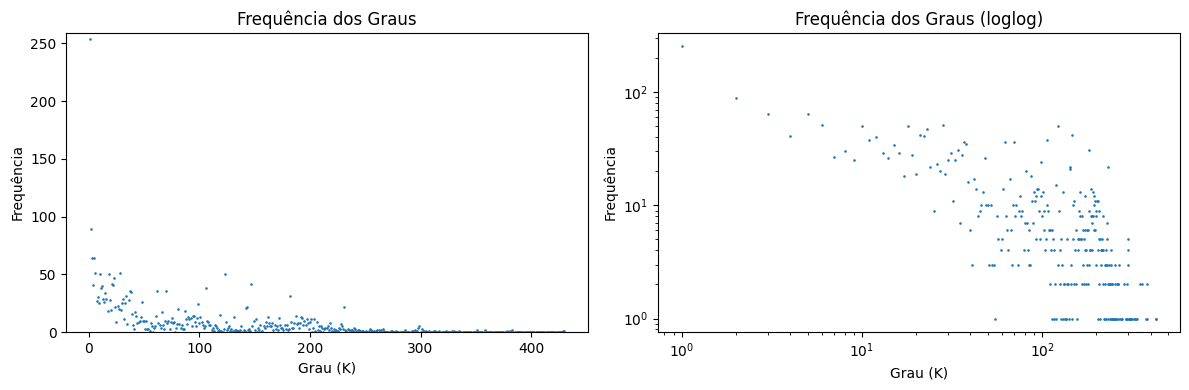

In [8]:
createGraphic(data = frequencies_of_degrees, xLabel = 'Grau (K)', yLabel = 'Frequência', title = 'Frequência dos Graus', limit = 5, lines = False, name_network = 'network_by_genres')

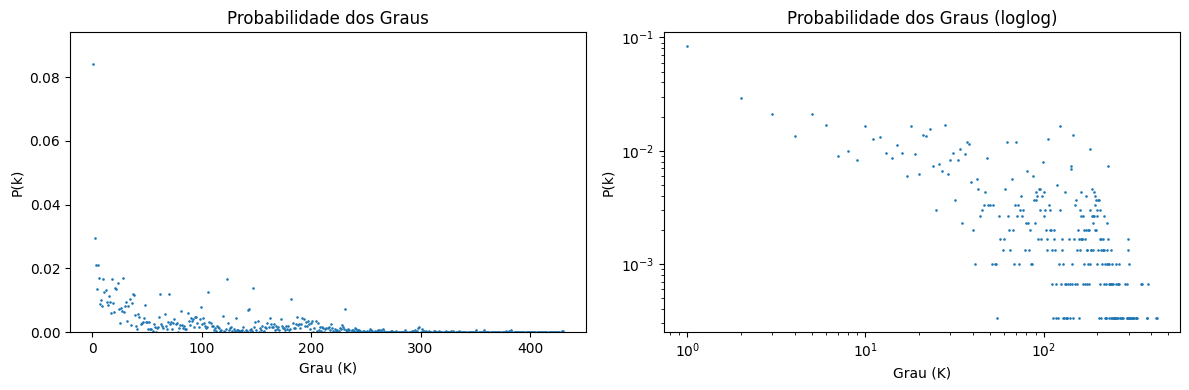

In [9]:
createGraphic(data = probability_of_degrees, xLabel = 'Grau (K)', yLabel = 'P(k)', title = 'Probabilidade dos Graus', limit = 0.01, lines = False,  name_network = 'network_by_genres')

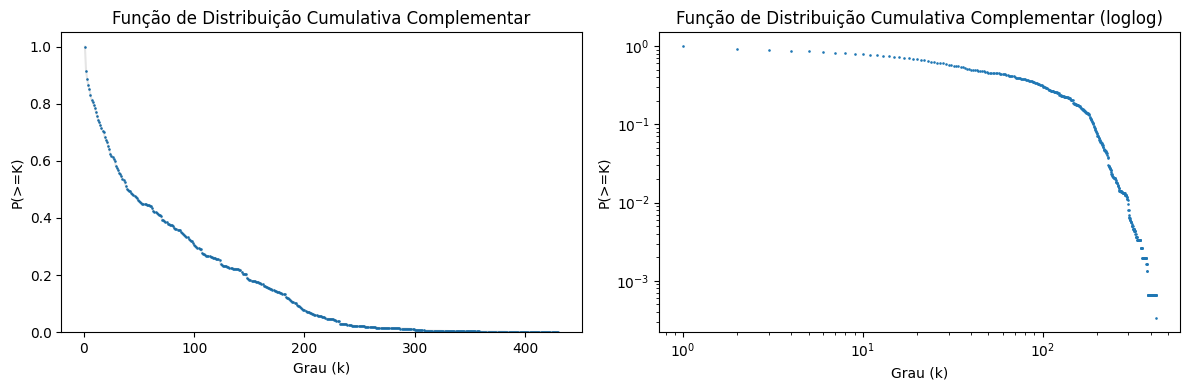

In [10]:
createGraphic(data = accumulated_probability_of_degress, xLabel = 'Grau (k)', yLabel = 'P(>=K)', title = 'Função de Distribuição Cumulativa Complementar', limit = 0.05, lines = True,  name_network = 'network_by_genres')

In [11]:
degree_centrality, eigenvector_centrality, closeness_centrality, betweenness_centrality = calculateCentralities(network)

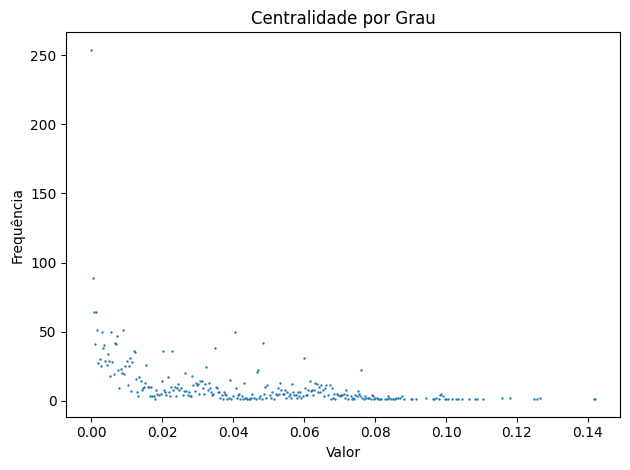

Informações gerais sobre os resultados encontrados:
	Quantidade de valores diferentes para a centralidade em estudo: 278.
	O menor valor é 0.0 e sua frequência é 254.
	O maior valor é 0.14195896757114493 e sua frequência é 1.


In [12]:
analysis_centrality = createGraphicCentrality(data = degree_centrality, title = 'Centralidade por Grau', name_network = 'network_by_genres')
printInformationAnalysisCentrality(analysis_centrality)

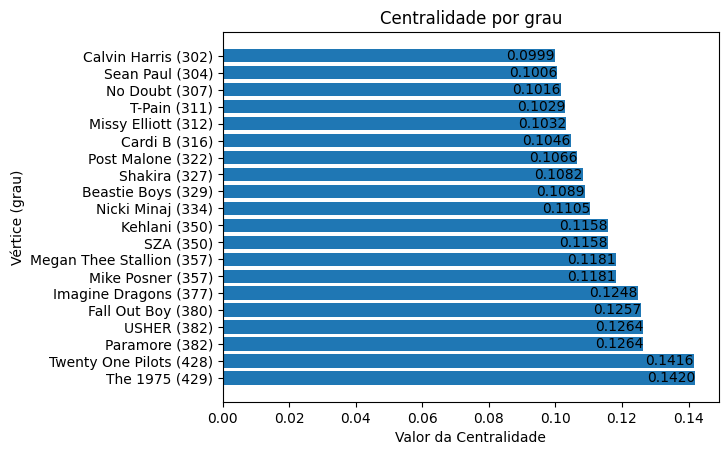

In [13]:
createRankingCentrality(df=df, centrality = degree_centrality, network = network, title = 'Centralidade por grau', name_network = 'network_by_genres')

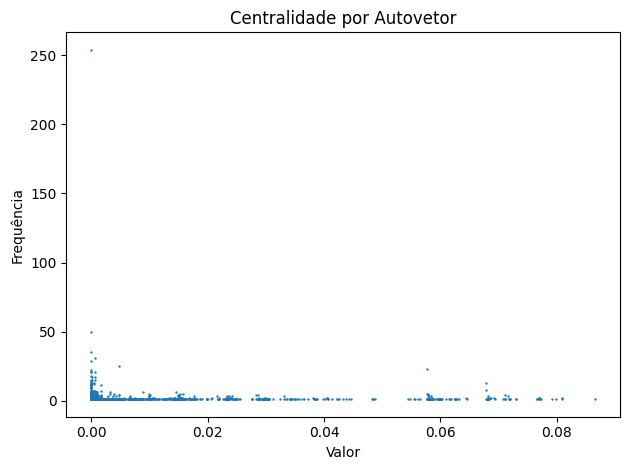

Informações gerais sobre os resultados encontrados:
	Quantidade de valores diferentes para a centralidade em estudo: 1456.
	O menor valor é 1.119466316817376e-89 e sua frequência é 254.
	O maior valor é 0.08653952086858786 e sua frequência é 1.


In [14]:
analysis_centrality = createGraphicCentrality(data = eigenvector_centrality, title = 'Centralidade por Autovetor', name_network = 'network_by_genres')
printInformationAnalysisCentrality(analysis_centrality)

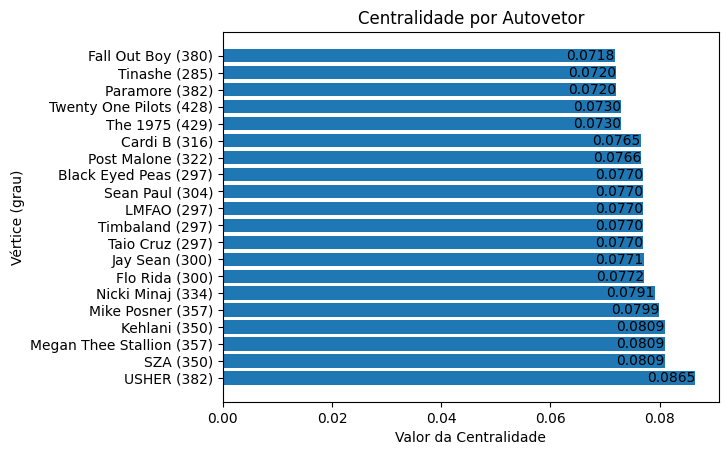

In [15]:
centrality_ranking = sorted(eigenvector_centrality, reverse = True)
createRankingCentrality(df=df, centrality = eigenvector_centrality, network = network, title = 'Centralidade por Autovetor', name_network = 'network_by_genres')

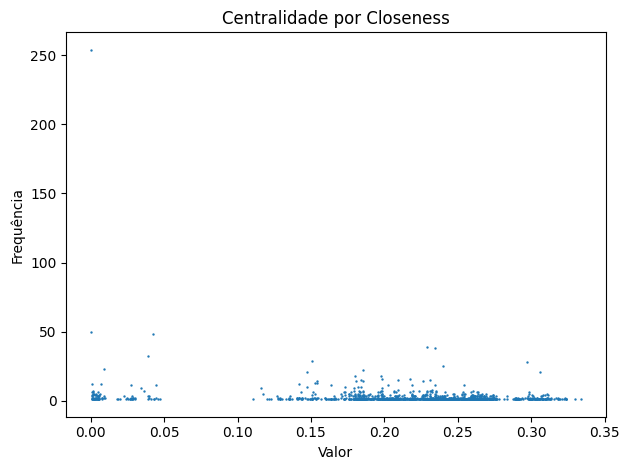

Informações gerais sobre os resultados encontrados:
	Quantidade de valores diferentes para a centralidade em estudo: 1189.
	O menor valor é 0.0 e sua frequência é 254.
	O maior valor é 0.3340729642745919 e sua frequência é 1.


In [16]:
analysis_centrality = createGraphicCentrality(data = closeness_centrality, title = 'Centralidade por Closeness', name_network = 'network_by_genres')
printInformationAnalysisCentrality(analysis_centrality)

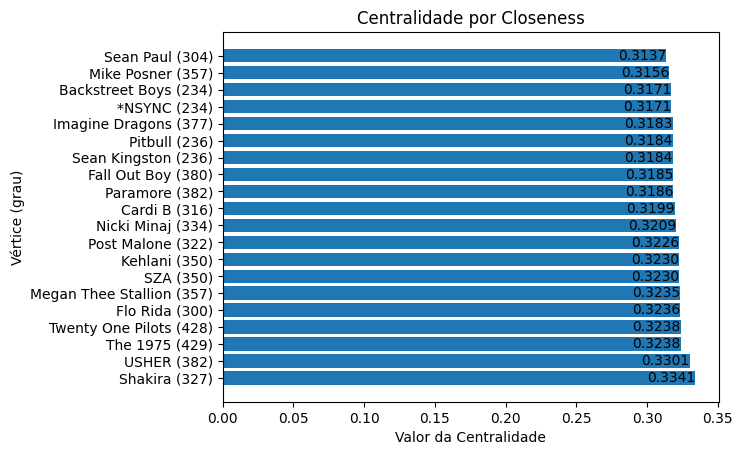

In [17]:
centrality_ranking = sorted(closeness_centrality, reverse = True)
createRankingCentrality(df=df, centrality = closeness_centrality, network = network, title = 'Centralidade por Closeness', name_network = 'network_by_genres')

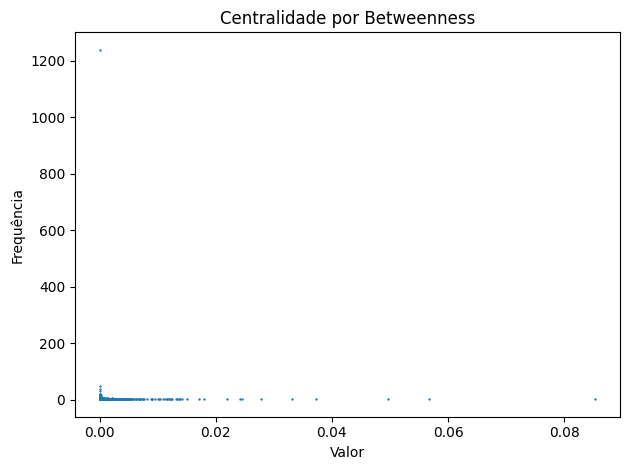

Informações gerais sobre os resultados encontrados:
	Quantidade de valores diferentes para a centralidade em estudo: 1108.
	O menor valor é 0.0 e sua frequência é 1239.
	O maior valor é 0.08534866398965389 e sua frequência é 1.


In [18]:
analysis_centrality = createGraphicCentrality(data = betweenness_centrality, title = 'Centralidade por Betweenness', name_network = 'network_by_genres')
printInformationAnalysisCentrality(analysis_centrality)

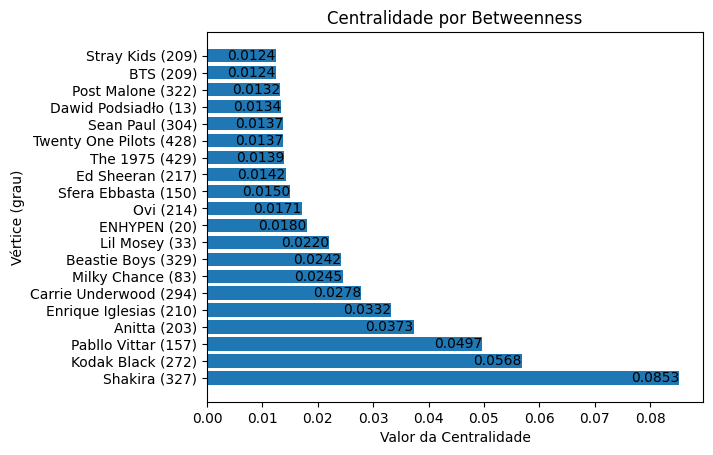

In [19]:
centrality_ranking = sorted(betweenness_centrality, reverse = True)
createRankingCentrality(df=df, centrality = betweenness_centrality, network = network, title = 'Centralidade por Betweenness', name_network = 'network_by_genres')